In [1]:
import math
import sys
import matplotlib.pyplot as plt

import boto3
import numpy as np

sys.path.append('../')
sys.path.append('../../')
from run_utils import get_env_dataset, run_env_experiment, plot_ratings_mses
from run_utils import s3_experiment_dir_name, plot_ratings_mses_s3
from reclab.environments import Topics, LatentFactorBehavior
from env_defaults import *
from reclab.recommenders import TopPop


ModuleNotFoundError: No module named 'functional'

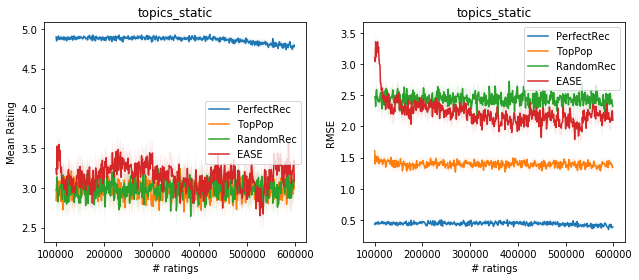

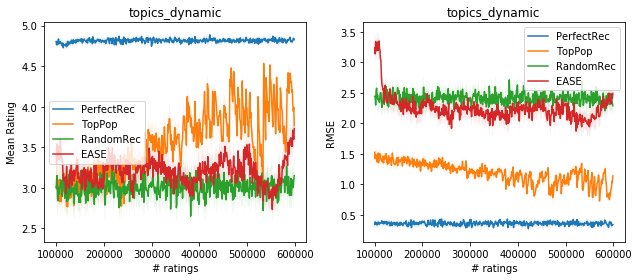

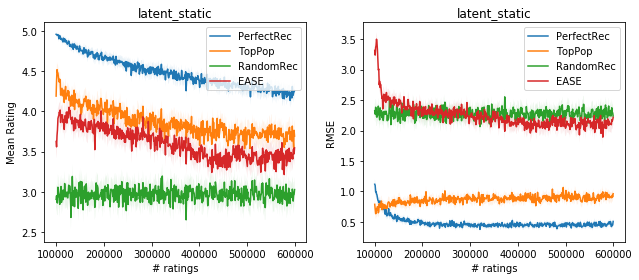

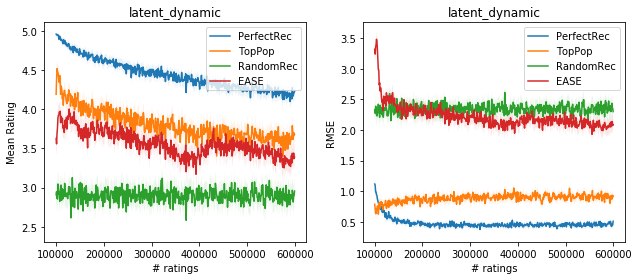

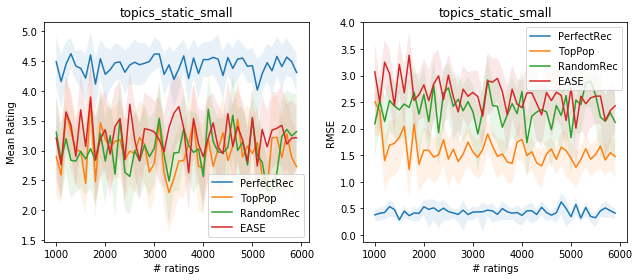

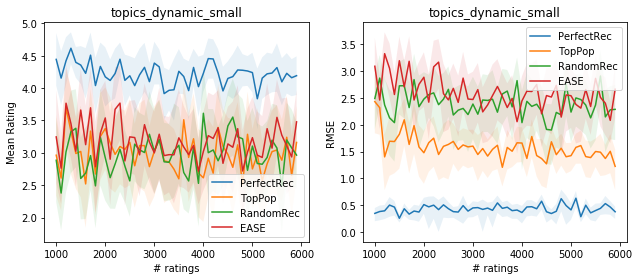

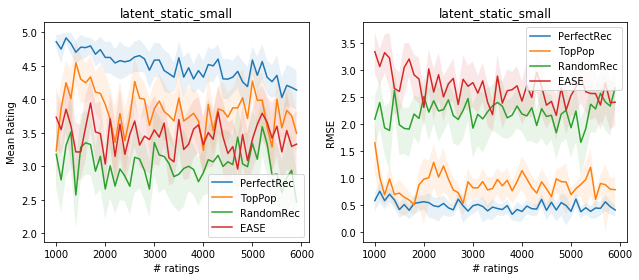

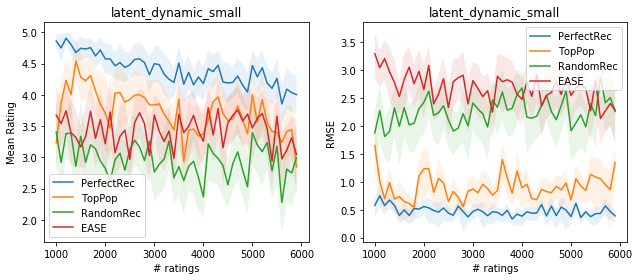

In [2]:
# S3 storage parameters
bucket_name = 'recsys-eval'
data_dir = 'master'

env_names = ['topics_static', 'topics_dynamic', 'latent_static', 'latent_dynamic'] + \
            ['topics_static_small', 'topics_dynamic_small', 'latent_static_small', 'latent_dynamic_small']
recommender_names = ['PerfectRec', 'TopPop', 'RandomRec', 'EASE']

for env_name in env_names:

    if env_name == 'topics_static':
        ENV_PARAMS = TOPICS_STATIC
    elif env_name == 'topics_dynamic':
        ENV_PARAMS = TOPICS_DYNAMIC
    elif env_name == 'latent_static':
        ENV_PARAMS = LATENT_STATIC
    elif env_name == 'latent_dynamic':
        ENV_PARAMS = LATENT_DYNAMIC
    elif env_name == 'topics_static_small':
        ENV_PARAMS = TOPICS_STATIC_SMALL
    elif env_name == 'topics_dynamic_small':
        ENV_PARAMS = TOPICS_DYNAMIC_SMALL
    elif env_name == 'latent_static_small':
        ENV_PARAMS = LATENT_STATIC_SMALL
    elif env_name == 'latent_dynamic_small':
        ENV_PARAMS = LATENT_DYNAMIC_SMALL
    else:
        assert False, "environment not implemented!"


    # Experiment setup.
    n_trials = 1
    trial_seeds = [i for i in range(n_trials)]
    num_init_ratings = ENV_PARAMS['optional_params']['num_init_ratings']
    len_trial = get_len_trial(ENV_PARAMS)
    num_users = ENV_PARAMS['params']['num_users']

    environment_name = ENV_PARAMS['name']
    env_name = ENV_PARAMS['name']

    plot_ratings_mses_s3(recommender_names,
                         len_trial,
                         bucket_name,
                         data_dir,
                         env_name,
                         trial_seeds,
                         plot_dense=False,
                         num_users=num_users,
                         num_init_ratings=num_init_ratings,
                         threshold=10,
                         title=[env_name, env_name])
    